In [1]:
import pandas as pd

filepath = './../data/dataset_size_info_complete.parquet'
df = pd.read_parquet(filepath)

df_aodsim = df[df['tier'] == 'AODSIM']


In [2]:
from cmSim.utils import merge_pwgs_in_dataframe

df_aodsim = merge_pwgs_in_dataframe(df_aodsim)
df_aodsim.head(None)


C:\Users\simon\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,d_dataset,dsize,nfiles,devts,tier,pwg,campaign
0,/Exotica_RSGravitonEE_M750_001/Summer08_IDEAL_...,2.902498e+09,3,21182,AODSIM,None,None
1,/Exotica_RSGravitonDiJetM700/Summer08_IDEAL_V1...,4.898815e+09,63,31603,AODSIM,None,None
2,/Exotica_BPrimeTW_M300/Summer08_IDEAL_V11_redi...,1.166423e+10,105,64600,AODSIM,None,None
3,/PhotonJets200toInf-madgraph/Fall08_IDEAL_V11_...,6.694212e+11,549,5186502,AODSIM,None,None
4,/PhotonJet_Pt20to30/Summer09-MC_31X_V3_AODSIM-...,1.216578e+10,15,116508,AODSIM,None,None
...,...,...,...,...,...,...,...
128703,/Wprime_VBF_WZ_WhadZlep_narrow_M6000_TuneCP5_1...,7.469142e+09,3,23000,AODSIM,B2G,RunIISummer20UL16RECO
128705,/Radion_VBF_ZZ_ZlepZhad_narrow_M1400_TuneCP5_1...,2.134389e+10,8,50000,AODSIM,B2G,RunIISummer20UL17RECO
128708,/Wprime_ggF_WZ_WhadZlep_narrow_M4000_TuneCP5_1...,2.128891e+10,7,50000,AODSIM,B2G,RunIISummer20UL18RECO
128709,/ZJetsToNuNu_HT-800To1200_TuneCP5_13TeV-madgra...,2.379383e+11,106,703970,AODSIM,SUS,RunIISummer20UL16RECOAPV


In [3]:
from pprint import pprint
from cmSim.config.pwgs import PWGs

PWGs['PAGs'].pop('FSQ', None)  # merged with SMP
PWGs['others'].pop('FWD', None)  # merged with SMP
PWGs['others'].pop('QCD', None)  # merged with SMP

pprint(PWGs)


{'DPGs': {'BRIL': 'BRIL',
          'CSC': 'Muon CSC',
          'CTPPS': 'CT-PPS',
          'DT': 'Muon DT',
          'ECAL': 'ECAL',
          'GEM': 'Muon Gem',
          'HCA': 'HCAL',
          'HGC': 'HGCAL',
          'L1T': 'Trigger L1',
          'MDT': 'MTD',
          'MUON': 'Muon',
          'RPC': 'Muon RPC',
          'TRACKER': 'Tracker'},
 'PAGs': {'B2G': 'Beyond Two Generations',
          'BPH': 'B Physics',
          'EXO': 'Exotica',
          'HIG': 'Higgs',
          'HIN': 'Heavy Ions',
          'SMP': 'Standard Model',
          'SUS': 'Susy',
          'TOP': 'Top Physics'},
 'POGs': {'BTV': 'Btag and vertexing',
          'EGM': 'e-gamma',
          'GEN': 'Generators',
          'JME': 'JetMet',
          'LUM': 'Lumi',
          'MUO': 'Muon',
          'PRO': 'Protons',
          'TAU': 'Tau',
          'TRK': 'Tracking',
          'UPG': 'Upgrade Studies'},
 'others': {'CPF': '?',
            'EWK': 'Electroweak Physics',
            'None': '?',
     

In [4]:
grouping = {}

for group in PWGs:
    grouping[group] = {}
    for pwg in PWGs[group]:
        df_pwg = df_aodsim[df_aodsim['pwg'] == pwg]
        grouping[group][pwg] = {'group_name': PWGs[group][pwg],
                                'num_datasets': len(df_pwg),
                                'total_size(PB)': round(df_pwg['dsize'].sum() / 1e15, 3),
                                'mean_dsize(TB)': round(df_pwg['dsize'].mean() / 1e12, 3)}
pprint(grouping['PAGs'])


{'B2G': {'group_name': 'Beyond Two Generations',
         'mean_dsize(TB)': 0.099,
         'num_datasets': 12294,
         'total_size(PB)': 1.222},
 'BPH': {'group_name': 'B Physics',
         'mean_dsize(TB)': 2.233,
         'num_datasets': 1684,
         'total_size(PB)': 3.76},
 'EXO': {'group_name': 'Exotica',
         'mean_dsize(TB)': 0.05,
         'num_datasets': 31788,
         'total_size(PB)': 1.576},
 'HIG': {'group_name': 'Higgs',
         'mean_dsize(TB)': 0.713,
         'num_datasets': 16595,
         'total_size(PB)': 11.838},
 'HIN': {'group_name': 'Heavy Ions',
         'mean_dsize(TB)': 0.652,
         'num_datasets': 1046,
         'total_size(PB)': 0.682},
 'SMP': {'group_name': 'Standard Model',
         'mean_dsize(TB)': 3.375,
         'num_datasets': 1763,
         'total_size(PB)': 5.951},
 'SUS': {'group_name': 'Susy',
         'mean_dsize(TB)': 2.206,
         'num_datasets': 2972,
         'total_size(PB)': 6.556},
 'TOP': {'group_name': 'Top Physics',


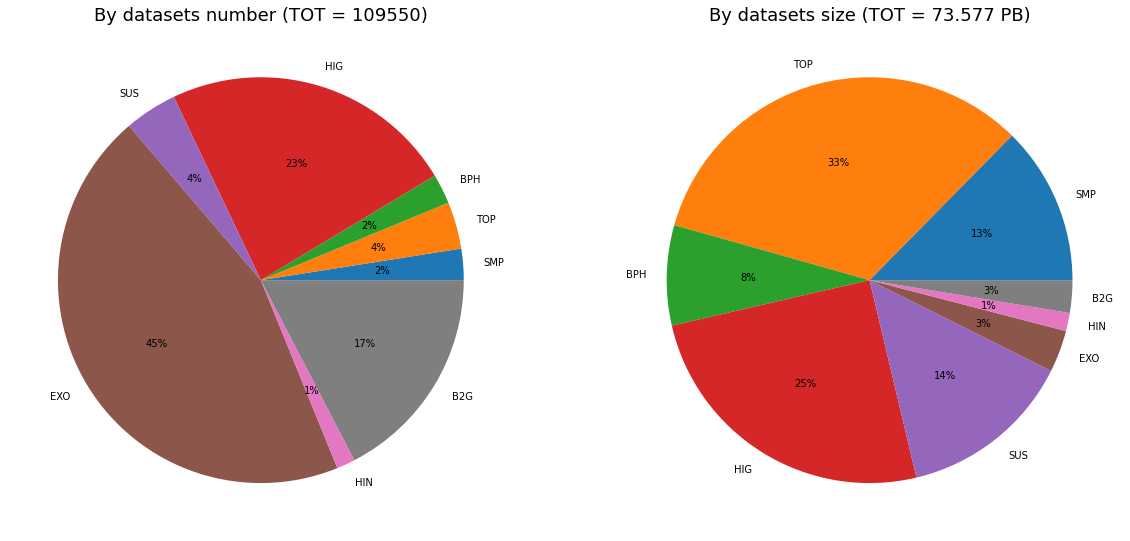

In [5]:
import pylab as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
pags = list(grouping['PAGs'].keys())

num_datasets = [grouping['PAGs'][pag]['num_datasets'] for pag in pags]
ax1.pie(num_datasets, labels=pags, autopct='%1.0f%%', normalize=True)
total_number = df_aodsim['d_dataset'].nunique()
ax1.set_title(f'By datasets number (TOT = {total_number})', fontsize=18)

total_size = [grouping['PAGs'][pag]['total_size(PB)'] for pag in pags]
ax2.pie(total_size, labels=pags, autopct='%1.0f%%', normalize=True)
total_size = round(df_aodsim['dsize'].sum() / 1e15, 3)
ax2.set_title(f'By datasets size (TOT = {total_size} PB)', fontsize=18)

fig.savefig('./../data/group_datasets_by_pag.png')
